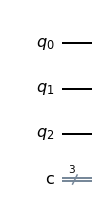

In [1]:
from qiskit import *
%matplotlib inline


circuit = QuantumCircuit(3, 3) # 3 q_bit e 3 bit

circuit.draw(output='mpl')

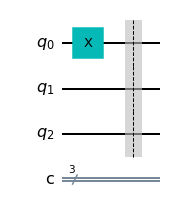

In [2]:
circuit.x(0)

circuit.barrier()
circuit.draw(output='mpl')

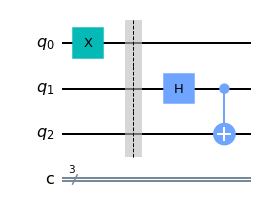

In [3]:
# vogliamo teletrasportare le info al di là della barriera
# creiamo un entanglement tra Q1 e Q2

circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

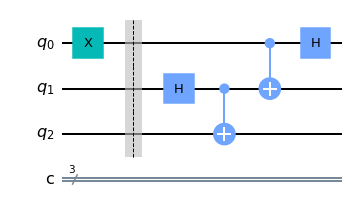

In [4]:
# facciamo lo stesso tra Q0 e Q1

circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

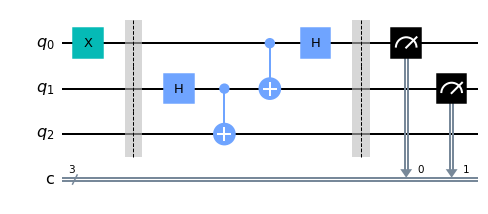

In [5]:
#aggiungiamo un'altra barriera e facciamo le nostre misurazioni

circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

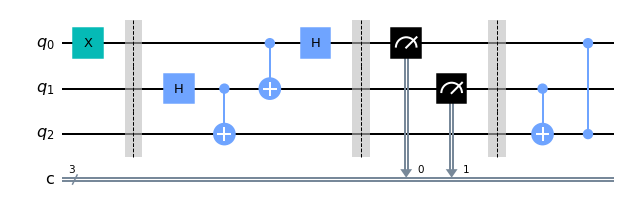

In [6]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

{'100': 224, '101': 273, '111': 265, '110': 262}


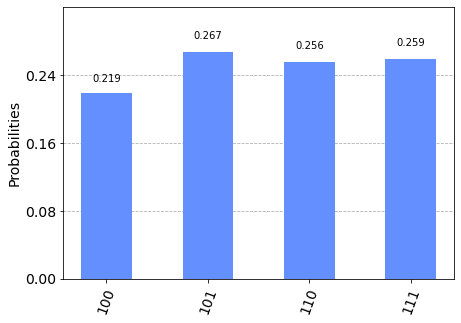

In [7]:
# usiamo un simulatore
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator, shots=1024).result()
conuts = result.get_counts()

from qiskit.tools.visualization import plot_histogram

print(conuts)
plot_histogram(conuts)

In [8]:
# vediamo come un computer quantistico riesca a trovare un  numero segreto in un solo try

n_secret = '00000011111010101010101001010101111010010101010'

circuit = QuantumCircuit(len(n_secret)+1, len(n_secret))

# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(n_secret)))
circuit.x(len(n_secret))
circuit.h(len(n_secret))

circuit.barrier()

for ii, yesno in enumerate(reversed(n_secret)):

    if yesno == '1':
        circuit.cx(ii, len(n_secret))

# creiamo il gate di uscita negli ultimi q-bit perché daranno il nostro output
# circuit.cx(5, 6)
# circuit.cx(3, 6)
# circuit.cx(0, 6)

circuit.barrier()
# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(n_secret)))
circuit.barrier()
# circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.measure(range(len(n_secret)), range(len(n_secret)))


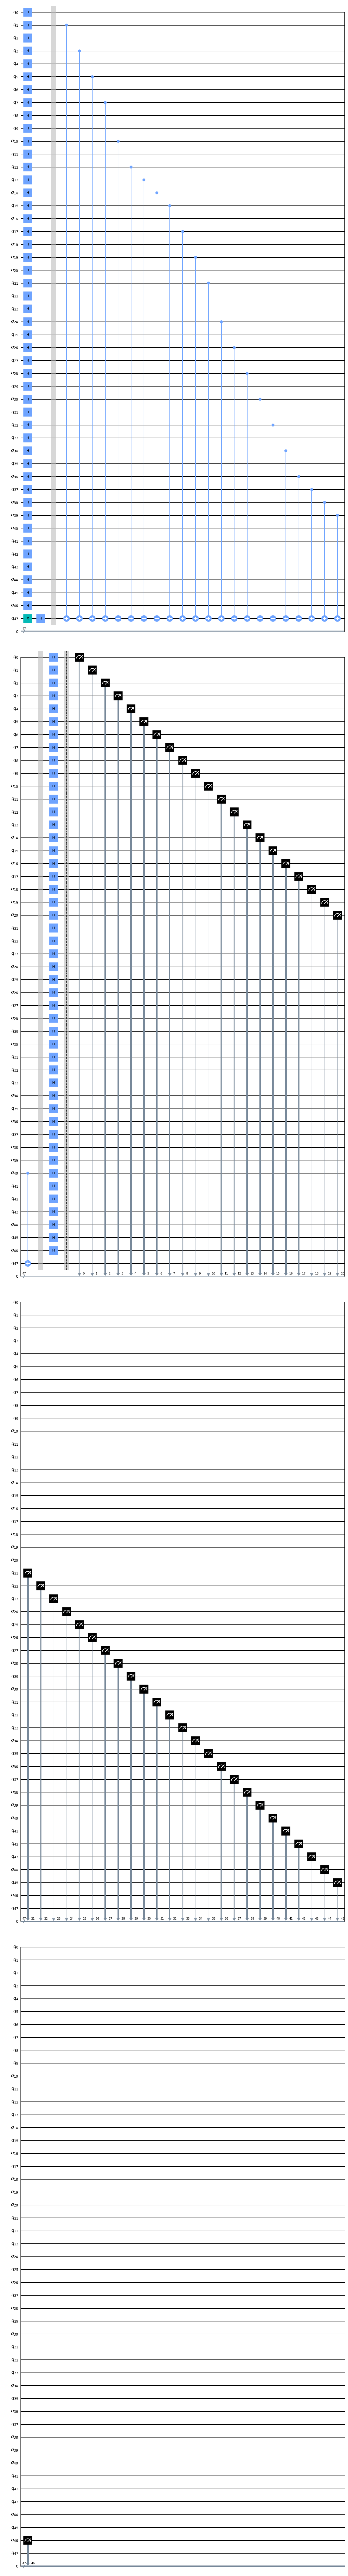

In [9]:
circuit.draw(output='mpl')

In [10]:
simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend=simulator, shots=1).result()

counts = result.get_counts()

print(counts)

{'00000011111010101010101001010101111010010101010': 1}
